Dataset Info:
Shape: (284807, 31)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Rate: 0.17%

=== Feature Engineering ===

New feature count: 40
New features: ['Hour', 'Amount_Log', 'Amount_Bin', 'V1_V2_interaction', 'V3_V4_interaction', 'V_mean', 'V_std', 'V_max', 'V_min']

Top 15 Correlated Features with Fraud:
Class     1.000000
V11       0.154876
V4        0.133447
V_std     0.120017
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
V_max     0.007293
Amount    0.005632
V26       0.004455
V25       0.003308
Name: Class, dtype: float64


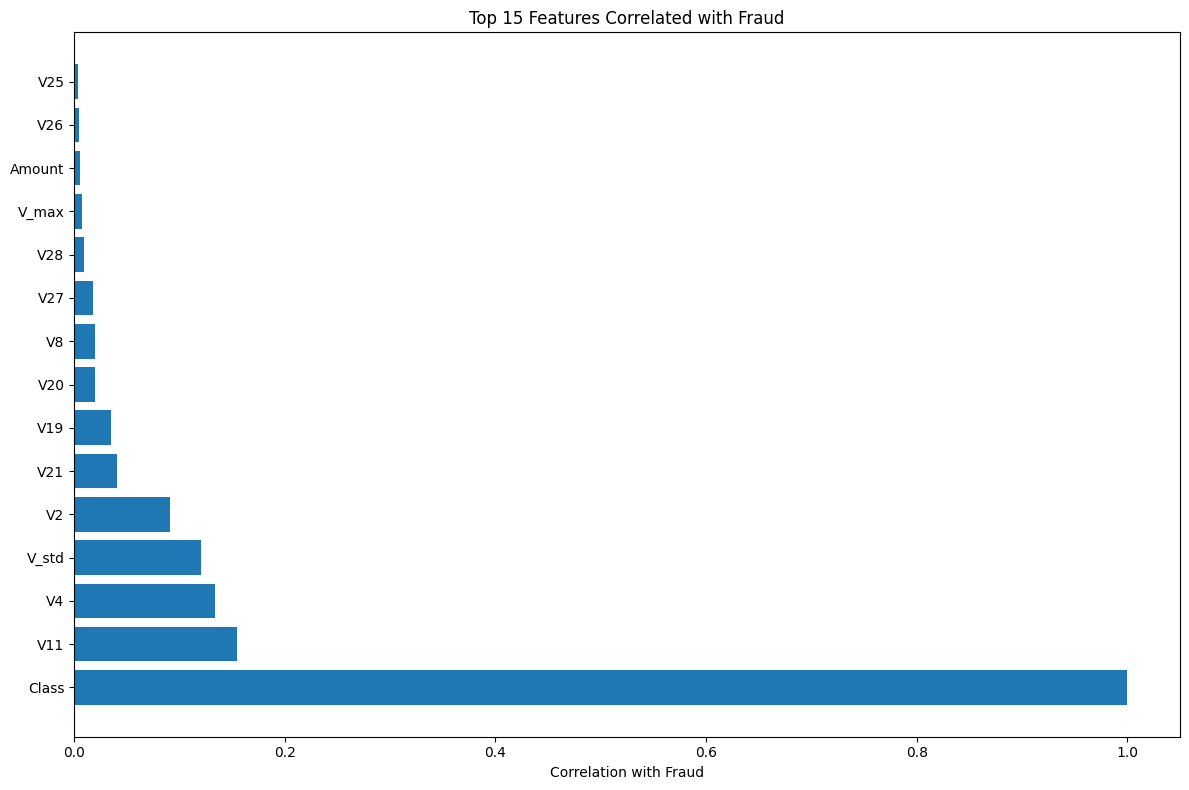


✅ Enhanced dataset saved to data/creditcard_enhanced.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/creditcard.csv')

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nClass Distribution:")
print(df['Class'].value_counts())
print(f"\nFraud Rate: {df['Class'].mean()*100:.2f}%")

# Feature Engineering - Add new features
print("\n=== Feature Engineering ===")

# 1. Transaction hour from Time feature
df['Hour'] = (df['Time'] // 3600) % 24

# 2. Amount bins
df['Amount_Log'] = np.log1p(df['Amount'])
df['Amount_Bin'] = pd.cut(df['Amount'], bins=5, labels=False)

# 3. V feature interactions (top correlated features)
df['V1_V2_interaction'] = df['V1'] * df['V2']
df['V3_V4_interaction'] = df['V3'] * df['V4']

# 4. Statistical features
v_cols = [col for col in df.columns if col.startswith('V')]
df['V_mean'] = df[v_cols].mean(axis=1)
df['V_std'] = df[v_cols].std(axis=1)
df['V_max'] = df[v_cols].max(axis=1)
df['V_min'] = df[v_cols].min(axis=1)

print(f"\nNew feature count: {len(df.columns)}")
print("New features:", [col for col in df.columns if col not in ['Time', 'Amount', 'Class'] + [f'V{i}' for i in range(1, 29)]])

# Analyze feature importance with correlation
plt.figure(figsize=(12, 8))
correlation = df.corr()['Class'].sort_values(ascending=False)
print("\nTop 15 Correlated Features with Fraud:")
print(correlation.head(15))

plt.barh(range(15), correlation.head(15).values)
plt.yticks(range(15), correlation.head(15).index)
plt.xlabel('Correlation with Fraud')
plt.title('Top 15 Features Correlated with Fraud')
plt.tight_layout()
plt.savefig('../models/feature_importance.png')
plt.show()

# Save enhanced dataset
df.to_csv('../data/creditcard_enhanced.csv', index=False)
print("\n✅ Enhanced dataset saved to data/creditcard_enhanced.csv")